In [2]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ti0_g_df
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ti0_g_df
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.4 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6706409 sha256=38ec41a1904d4391604808932c468eda567077d964316a21d1cc4138e427b090
  Stored in directory: /tmp/pip-ephem-wheel-cache-_z307sn3/wheels/d3/6e/bd/1969578f1456a6be

In [1]:
import torchvision

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo # модуль для загрузки готовых конфигураций и весов
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [5]:
# Загружаем конфиг и веса предобученной модели (Mask R-CNN)
# различает 80 классов (обучена на COCO)
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # порог уверенности
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

cfg.MODEL.DEVICE = "cpu" # по возможности на GPU!!
predictor = DefaultPredictor(cfg)

model_final_f10217.pkl: 178MB [00:01, 151MB/s]                           


In [12]:
# Загружаем изображение
!wget -O input.jpg https://cdn.fishki.net/upload/post/2016/07/27/2025767/1c56a2db1a7985e1c4bcf0257dd3537a.jpg

image = cv2.imread("input.jpg")

--2025-11-24 10:36:16--  https://cdn.fishki.net/upload/post/2016/07/27/2025767/1c56a2db1a7985e1c4bcf0257dd3537a.jpg
Resolving cdn.fishki.net (cdn.fishki.net)... 88.212.236.188, 88.212.236.180, 88.212.236.100
Connecting to cdn.fishki.net (cdn.fishki.net)|88.212.236.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194031 (189K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 189.48K   740KB/s    in 0.3s    

2025-11-24 10:36:17 (740 KB/s) - ‘input.jpg’ saved [194031/194031]



In [8]:
def segmentation (image):
  # Применяем модель
  outputs = predictor(image)

  # Визуализация
  v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

  plt.figure(figsize=(12, 8))
  plt.imshow(out.get_image()[:, :, ::-1])
  plt.axis("off")
  plt.show()

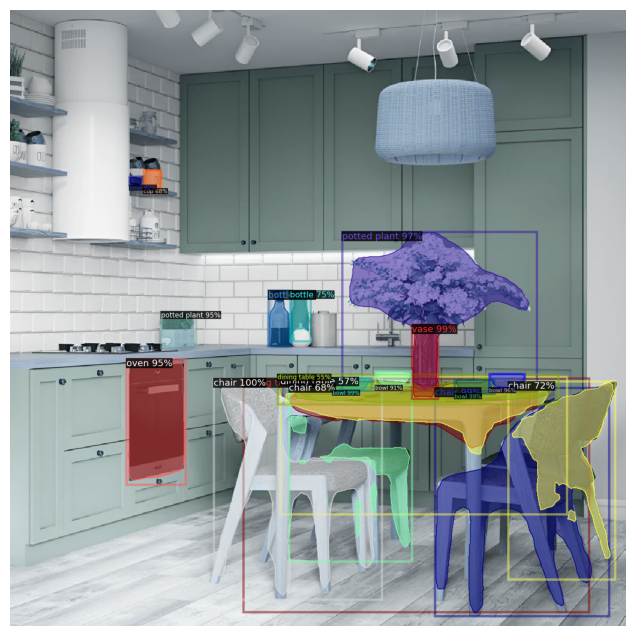

In [9]:
segmentation(image)

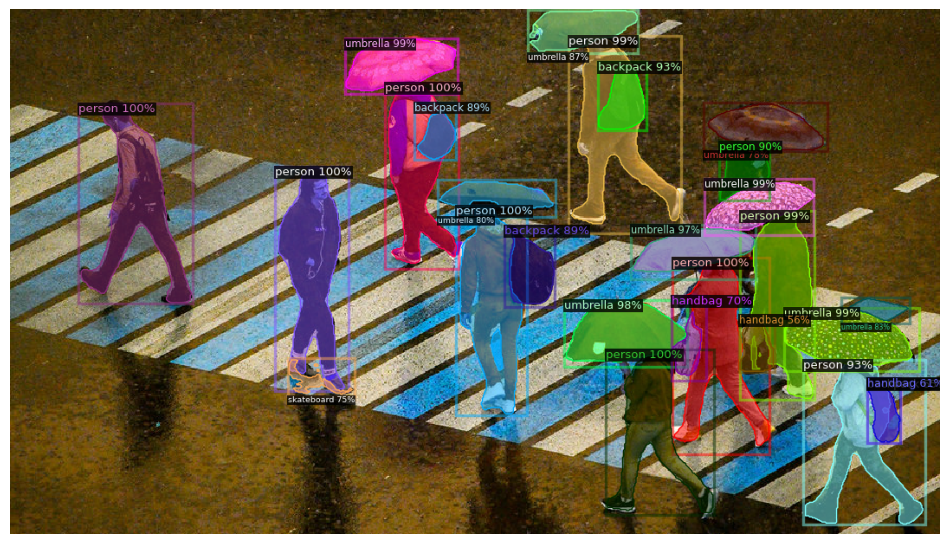

In [11]:
segmentation(image)

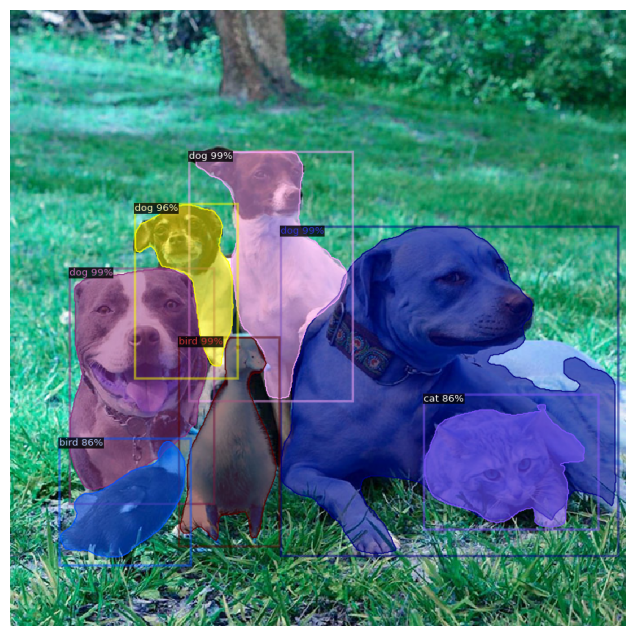

In [13]:
segmentation(image)